<a href="https://colab.research.google.com/github/kheuch2018/sea-classification/blob/main/Amelioration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation du dataset

In [ ]:
!unzip ./dataset.zip

Archive:  ./dataset.zip
   creating: dataset/
   creating: dataset/Mer/
  inflating: dataset/Mer/naqq.jpg    
  inflating: dataset/Mer/tagt0o.jpeg  
  inflating: dataset/Mer/kipoul3q.jpg  
  inflating: dataset/Mer/wqP0.jpeg   
  inflating: dataset/Mer/fdPl99.jpeg  
  inflating: dataset/Mer/lama5a.jpeg  
  inflating: dataset/Mer/tr50.jpg    
  inflating: dataset/Mer/plnnz.jpeg  
  inflating: dataset/Mer/ccooyy.jpeg  
  inflating: dataset/Mer/pluu.jpeg   
  inflating: dataset/Mer/qspmr.jpeg  
  inflating: dataset/Mer/huh6p01.jpeg  
  inflating: dataset/Mer/ttttt.jpeg  
  inflating: dataset/Mer/sha721lo.jpg  
  inflating: dataset/Mer/mqqxw.jpeg  
  inflating: dataset/Mer/s1aa.jpeg   
  inflating: dataset/Mer/tttttta.jpeg  
  inflating: dataset/Mer/troaq.jpeg  
  inflating: dataset/Mer/uidks.jpeg  
  inflating: dataset/Mer/wawm2.jpeg  
  inflating: dataset/Mer/dark8w.jpeg  
  inflating: dataset/Mer/njhuy.jpeg  
  inflating: dataset/Mer/hdjst67.jpg  
  inflating: dataset/Mer/n7.jpg      
  

In [ ]:
import os, glob, shutil,random

In [ ]:
os.chdir("./dataset")
os.makedirs("train/mer")
os.makedirs("train/ailleurs")
os.makedirs("valid/mer")
os.makedirs("valid/ailleurs")
os.makedirs("test/mer")
os.makedirs("test/ailleurs")

In [ ]:
os.chdir("Ailleurs")

In [ ]:
len(glob.glob("*"))

207

In [ ]:
os.chdir("../Mer")
len(glob.glob("*"))

207

In [ ]:
os.chdir("..")

In [25]:
for c in random.sample(glob.glob("Mer/*"),145):
  shutil.move(c,"train/mer")
for c in random.sample(glob.glob("Ailleurs/*"),145):
  shutil.move(c,"train/ailleurs")

for c in random.sample(glob.glob("Mer/*"),41):
  shutil.move(c,"valid/mer")
for c in random.sample(glob.glob("Ailleurs/*"),41):
  shutil.move(c,"valid/ailleurs")

for c in random.sample(glob.glob("Mer/*"),len(glob.glob("Mer/*"))):
  shutil.move(c,"test/mer")
for c in random.sample(glob.glob("Ailleurs/*"),len(glob.glob("Ailleurs/*"))):
  shutil.move(c,"test/ailleurs")


In [26]:
os.rmdir("Ailleurs")
os.rmdir("Mer")

In [27]:
os.chdir("..")

In [29]:
train_path = "./dataset/train"
valid_path = "./dataset/valid"
test_path = "./dataset/test"

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [54]:
train_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(train_path,batch_size=10, target_size=(224,224), classes=["mer","ailleurs"])
valid_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(valid_path,batch_size=10, target_size=(224,224), classes=["mer","ailleurs"])
test_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(test_path,batch_size=10, target_size=(224,224), classes=["mer","ailleurs"], shuffle=False)

Found 290 images belonging to 2 classes.
Found 82 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


In [34]:
imgs, labels = next(train_batch)

In [35]:
import matplotlib.pyplot as plt


In [36]:
def plotImages(images_arr):
  fig,axes = plt.subplots(1,10, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr,axes):
    ax.imshow(img)
    ax.axis("off")
  plt.tight_layout()
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

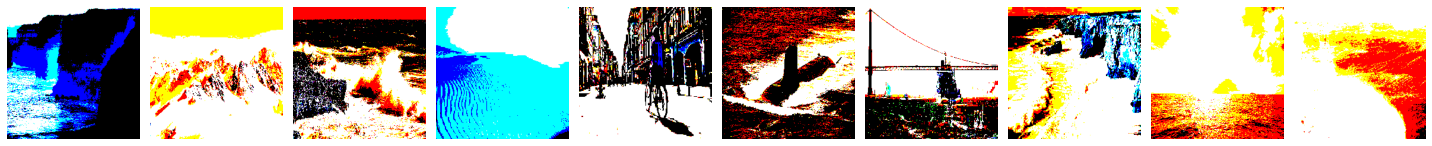

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [38]:
plotImages(imgs)
print(labels)

# Transfer learning

In [60]:
vgg_model = tf.keras.applications.vgg16.VGG16()

In [61]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [63]:
model = Sequential()

In [64]:
for layer in vgg_model.layers[:-1]:
  model.add(layer)

In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [66]:
for layer in model.layers:
  layer.trainable = False

In [67]:
model.add(Dense(
    units=2,activation="softmax"
))

In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [69]:
model.compile(optimizer=Adam(learning_rate=.0001),loss="categorical_crossentropy",metrics=["accuracy"])

In [70]:
model.fit(x=train_batch,validation_data=valid_batch, verbose=2, epochs=15)

Epoch 1/15
29/29 - 4s - loss: 0.4765 - accuracy: 0.8034 - val_loss: 0.4287 - val_accuracy: 0.8415
Epoch 2/15
29/29 - 4s - loss: 0.2769 - accuracy: 0.9138 - val_loss: 0.3222 - val_accuracy: 0.8659
Epoch 3/15
29/29 - 4s - loss: 0.2082 - accuracy: 0.9241 - val_loss: 0.2792 - val_accuracy: 0.9268
Epoch 4/15
29/29 - 4s - loss: 0.1718 - accuracy: 0.9345 - val_loss: 0.2600 - val_accuracy: 0.9146
Epoch 5/15
29/29 - 4s - loss: 0.1462 - accuracy: 0.9483 - val_loss: 0.2503 - val_accuracy: 0.9146
Epoch 6/15
29/29 - 4s - loss: 0.1273 - accuracy: 0.9586 - val_loss: 0.2396 - val_accuracy: 0.9146
Epoch 7/15
29/29 - 4s - loss: 0.1129 - accuracy: 0.9655 - val_loss: 0.2360 - val_accuracy: 0.9390
Epoch 8/15
29/29 - 4s - loss: 0.1008 - accuracy: 0.9759 - val_loss: 0.2349 - val_accuracy: 0.9390
Epoch 9/15
29/29 - 4s - loss: 0.0898 - accuracy: 0.9759 - val_loss: 0.2337 - val_accuracy: 0.9390
Epoch 10/15
29/29 - 4s - loss: 0.0826 - accuracy: 0.9759 - val_loss: 0.2329 - val_accuracy: 0.9390
Epoch 11/15
29/29 -

In [73]:
test_batch.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [74]:
import numpy as np


In [79]:
predictions = np.argmax(model.predict(x=test_batch), axis=1)
predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [77]:
from sklearn.metrics import confusion_matrix

In [82]:
cm = confusion_matrix(y_true=test_batch.classes,y_pred=predictions)
cm

array([[18,  3],
       [ 1, 20]])

In [84]:
import matplotlib.pyplot as plt
import itertools

In [85]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[18  3]
 [ 1 20]]


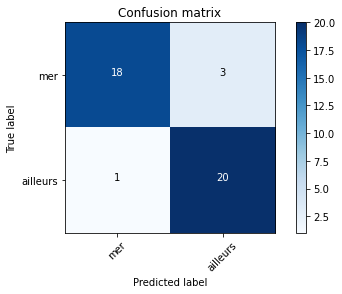

In [86]:
plot_confusion_matrix(cm=cm,classes=["mer", "ailleurs"])

In [87]:
!rm -rf sample_data/

In [107]:
!touch .gitignore


In [108]:
!echo "dataset/" >> .gitignore

In [114]:
!git init

Initialized empty Git repository in /content/.git/


In [115]:
!git add .
!git commit -m "adding repo to git"

[master (root-commit) d0bd7bf] adding repo to git
 16 files changed, 709 insertions(+)
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/gce
 create mode 100644 .config/logs/2021.03.05/14.35.57.114217.log
 create mode 100644 .config/logs/2021.03.05/14.36.17.080333.log
 create mode 100644 .config/logs/2021.03.05/14.36.31.463841.log
 create mode 100644 .config/logs/2021.03.05/14.36.37.024558.log
 create mode 100644 .config/logs/2021.03.05/14.36.52.882999.log
 create mode 100644 .config/logs/2021.03.05/14.36.53.409573.log
 create mode 100644 .gitignone
 create mode 100644 .gitignore
 create mode 100644 dataset.zip
